In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Package Installation

In [ ]:
import torch, torchvision,numpy
print(torch.__version__, torch.cuda.is_available(),numpy.__version__) #1.13.1 True 1.23.5


2.0.1+cu118 True 1.22.4


In [ ]:
# !pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+
# !pip install dist/paddleocr-2.0.1-py3-none-any.whl # x.x.x is the version of paddleocr
!pip install paddleocr

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 

In [ ]:
# Line and word segmentation
from google.colab import output
output.enable_custom_widget_manager()
#-----------------------------
# imports
#-----------------------------
from paddleocr import PaddleOCR
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm
from glob import glob
from pprint import pprint
import os
from google.colab.patches import cv2_imshow
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -U layoutparser
!pip install ultralytics
# !pip install --no-binary protobuf protobuf==3.20.0
# # !pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+
# # !pip install dist/paddleocr-2.0.1-py3-none-any.whl # x.x.x is the version of paddleocr
# !pip install paddleocr
!pip install bnunicodenormalizer
!pip install onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.5 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31531 sha256=51b5bd0489cdca09a0ef0f97f00869e41fba86b203f51c46b6f8d1bbb6e268a0
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
  Created wheel for pdfplumber: filename=pdfplumber-0.10.0-py3-none-any.whl size=47309 sha256=1c3edd35

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bnunicodenormalizer: filename=bnunicodenormalizer-0.1.6-py3-none-any.whl size=22779 sha256=53e002e5aae3a919167d4838be8706bee41d4e45db8402eaf06104d482ae1f66
  Stored in directory: /root/.cache/pip/wheels/f4/d7/e9/16732a619cbf5a63fdc9f6e2f9eb5fcf73fa023735237330e9
Successfully built bnunicodenormalizer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.1 MB/s eta 0:00:00


# Imports

In [ ]:
!nvcc --version

import pandas as pd
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm # progress bar
from datetime import datetime
import time
import matplotlib.pyplot as plt
#from pycocotools.coco import COCO
import os, json, cv2, random
import skimage.io as io
import copy
from pathlib import Path
from typing import Optional


# torch
import torch

# Albumenatations
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

#from pycocotools.coco import COCO
from sklearn.model_selection import StratifiedKFold

# glob
from glob import glob

# numba
# import numba
# from numba import jit

import warnings
warnings.filterwarnings('ignore') #Ignore "future" warnings and Data-Frame-Slicing warnings.


# detectron2
# from detectron2.structures import BoxMode
# from detectron2 import model_zoo
# from detectron2.config import get_cfg
# from detectron2.data import DatasetCatalog, MetadataCatalog
# from detectron2.engine import DefaultPredictor, DefaultTrainer, launch
# from detectron2.evaluation import COCOEvaluator
# from detectron2.structures import BoxMode
# from detectron2.utils.visualizer import ColorMode
# from detectron2.utils.logger import setup_logger
# from detectron2.utils.visualizer import Visualizer

# from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
# from detectron2.data import detection_utils as utils


# from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
# from detectron2.data import detection_utils as utils
# import detectron2.data.transforms as T
# from detectron2.evaluation import COCOEvaluator, inference_on_dataset
# import shutil
# setup_logger()

# Yolo
import layoutparser as lp
import cv2
import yaml
import io
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


# Image Layout

In [ ]:
config_yml =""
model_weight ='/content/drive/MyDrive/Research/Bangla OCR/weights/yolo/best.pt'

image_path = '/content/drive/MyDrive/Research/Bangla OCR/Dataset/50_test_data/00a9f4ae-1425-4976-a2dc-6da331aa3b32.png'
annotated_json_path= '/content/drive/MyDrive/Bangla OCR test data/50_test_data annotated /00a9f4ae-1425-4976-a2dc-6da331aa3b32m_json.json'



0: 640x448 8 paragraphs, 4 text_boxs, 120.5ms
Speed: 3.1ms preprocess, 120.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


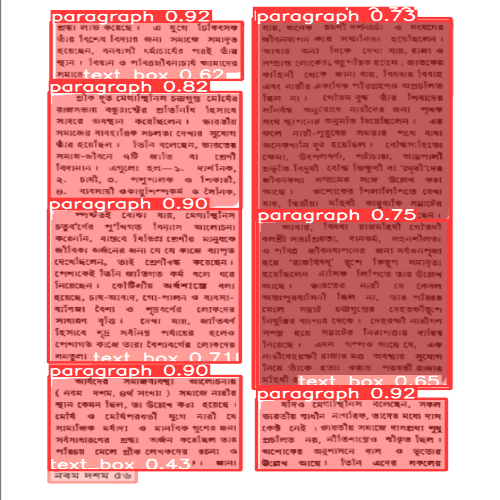

In [ ]:
# -----------------function form of yolo------------------

def run_yolo_model(model_weight,image_path):
  model = YOLO(model_weight)
#   image = image_path
  image = cv2.imread(image_path)
  # plt.imshow(image)
  color_map = {
      'text_box':   'red',
      'paragraph':  'blue',
      'image':   'green',
      'table':  'yellow',

  }

  # layout_predicted = model(image)
  res = model(image)
  res_plotted = res[0].plot()
  resized = cv2.resize(res_plotted, (500, 500))

  cv2_imshow(resized)
  # cv2_imshow(res_plotted)
  return res

res = run_yolo_model(model_weight,image_path)

In [ ]:
# results = model(img)
boxes = res[0].boxes
box = boxes[0]  # returns one box
box.xyxy

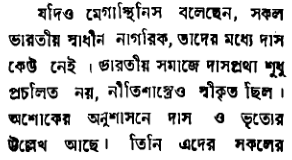

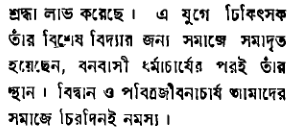

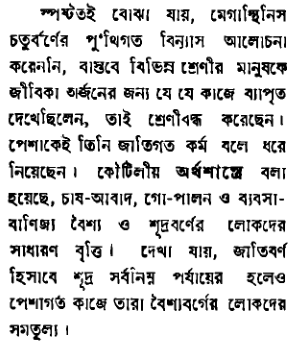

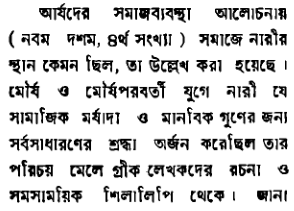

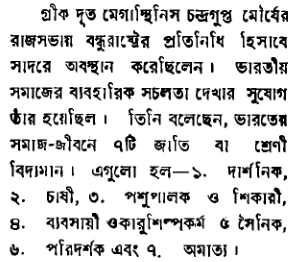

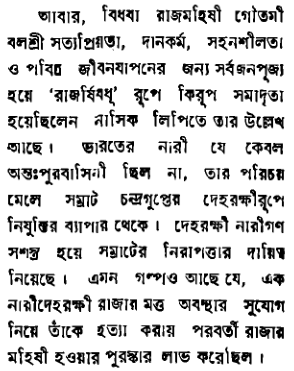

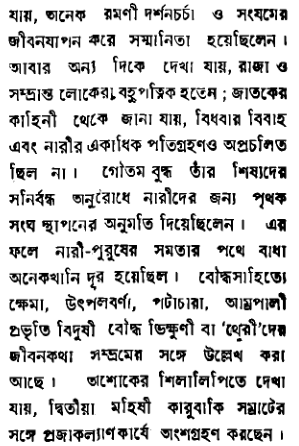

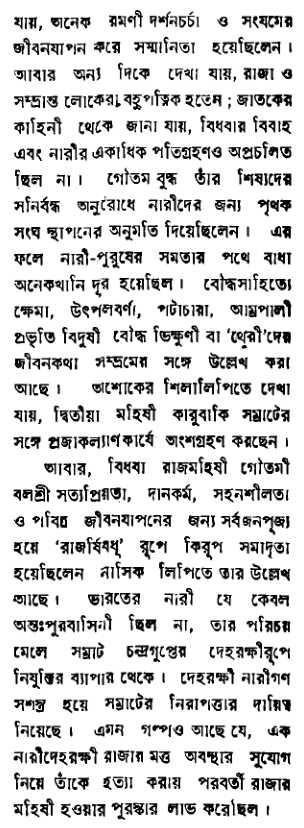

In [ ]:
def crop_all_text_box(image_path, res):
  croped_imgs=[]
#   image = image_path
  image = cv2.imread(image_path)
  for i in range(len(res[0].boxes)):

    x = int(res[0].boxes[i].xyxy[0][0])
    y = int(res[0].boxes[i].xyxy[0][1])
    width = int(res[0].boxes[i].xyxy[0][2] - res[0].boxes[i].xyxy[0][0])
    height = int(res[0].boxes[i].xyxy[0][3] - res[0].boxes[i].xyxy[0][1])

    crop_img = image[y:y+height, x:x+width]
    croped_imgs.append(crop_img)
    cv2_imshow(crop_img)

  return croped_imgs

text_boxes = crop_all_text_box( image_path, res)

In [ ]:
def single_image_layout(model_weight,image_path,config_yml):
  if len(config_yml)==0:
    return run_yolo_model(model_weight,image_path)
  else:
    return run_rcnn_model(model_weight,image_path,config_yml)



In [ ]:
# result = single_image_layout(model_weight,np.ascontiguousarray(inhanced_image[0]),config_yml)
result = single_image_layout(model_weight,image_path,config_yml)

# croped_images = crop_all_text_box( np.ascontiguousarray(inhanced_image[0]), result)
croped_images = crop_all_text_box( image_path, result)


# Line and word Segmentation

In [ ]:
#-----------------------------
# models
#-----------------------------
line=PaddleOCR(use_angle_cls=False, lang='en',use_gpu=True)
word=PaddleOCR(use_angle_cls=False, lang='ar',use_gpu=True)
#-----------------------------
# helpers
#-----------------------------
def create_mask(image,regions):
    h,w,_=image.shape
    mask=np.zeros((h,w))
    for i, region in enumerate(regions):
        region = np.array(region).astype(np.int32).reshape((-1))
        region = region.reshape(-1, 2)
        cv2.fillPoly(
            mask,
            [region.reshape((-1, 1, 2))],
            i+1
        )
    return mask
def get_coverage(image,mask):
    # -- coverage
    h,w,_=image.shape
    mask[mask>0]=1
    area=mask.sum()
    coverage=(area/(h*w))*100
    return coverage

In [ ]:
def Segment_line_detecting_word(image_path):
    img = cv2.imread(image_path)
    # img = cv2.imread(image_path)
    result_line= line.ocr(img,rec=False,cls=False)

    result_word= word.ocr(img,rec=False,cls=False)
    return result_word, result_line

In [ ]:
result_word, result_line= Segment_line_detecting_word(image_path)


In [ ]:
#-*- coding: utf-8 -*-
"""
@author:MD.Nazmuddoha Ansary
"""
from __future__ import print_function
#-------------------------
# imports
#-------------------------
import onnxruntime as ort
import numpy as np
import cv2
from bnunicodenormalizer import Normalizer
NORM=Normalizer()
#-------------------------
# helpers
#------------------------

def padWordImage(img,pad_loc,pad_dim,pad_val):
    '''
        pads an image with white value
        args:
            img     :       the image to pad
            pad_loc :       (lr/tb) lr: left-right pad , tb=top_bottom pad
            pad_dim :       the dimension to pad upto
            pad_val :       the value to pad
    '''

    if pad_loc=="lr":
        # shape
        h,w,d=img.shape
        # pad widths
        pad_width =pad_dim-w
        # pads
        pad =np.ones((h,pad_width,3))*pad_val
        # pad
        img =np.concatenate([img,pad],axis=1)
    else:
        # shape
        h,w,d=img.shape
        # pad heights
        if h>= pad_dim:
            return img
        else:
            pad_height =pad_dim-h
            # pads
            pad =np.ones((pad_height,w,3))*pad_val
            # pad
            img =np.concatenate([img,pad],axis=0)
    return img.astype("uint8")
#---------------------------------------------------------------
def correctPadding(img,dim,pvalue=255):
    '''
        corrects an image padding
        args:
            img     :       numpy array of single channel image
            dim     :       tuple of desired img_height,img_width
            pvalue  :       the value to pad
        returns:
            correctly padded image

    '''
    img_height,img_width=dim
    mask=0
    # check for pad
    h,w,d=img.shape

    w_new=int(img_height* w/h)
    img=cv2.resize(img,(w_new,img_height))
    h,w,d=img.shape

    if w > img_width:
        # for larger width
        h_new= int(img_width* h/w)
        img=cv2.resize(img,(img_width,h_new))
        # pad
        img=padWordImage(img,
                     pad_loc="tb",
                     pad_dim=img_height,
                     pad_val=pvalue)
        mask=img_width

    elif w < img_width:
        # pad
        img=padWordImage(img,
                    pad_loc="lr",
                    pad_dim=img_width,
                    pad_val=pvalue)
        mask=w

    # error avoid
    img=cv2.resize(img,(img_width,img_height))

    return img,mask

#-------------------------
# model class
#------------------------

class BanglaOCR(object):
    def __init__(self,
                model_weights,
                providers=['CUDAExecutionProvider'],
                img_height=32,
                img_width=256,
                pos_max=40):
        self.img_height=img_height
        self.img_width =img_width
        self.pos_max   =pos_max
        self.model     =ort.InferenceSession(model_weights, providers=providers)
        self.vocab     =["blank","!","\"","#","$","%","&","'","(",")","*","+",",","-",".","/",":",";","<","=",">","?","।",
                        "ঁ","ং","ঃ","অ","আ","ই","ঈ","উ","ঊ","ঋ","এ","ঐ","ও","ঔ",
                        "ক","খ","গ","ঘ","ঙ","চ","ছ","জ","ঝ","ঞ","ট","ঠ","ড","ঢ","ণ","ত","থ","দ","ধ","ন",
                        "প","ফ","ব","ভ","ম","য","র","ল","শ","ষ","স","হ",
                        "া","ি","ী","ু","ূ","ৃ","ে","ৈ","ো","ৌ","্",
                        "ৎ","ড়","ঢ়","য়","০","১","২","৩","৪","৫","৬","৭","৮","৯","‍","sep","pad"]

    def process_batch(self,crops):
        batch_img=[]
        batch_pos=[]
        for img in crops:
            # correct padding
            img,_=correctPadding(img,(self.img_height,self.img_width))
            # normalize
            img=img/255.0
            # extend batch
            img=np.expand_dims(img,axis=0)
            batch_img.append(img)
            # pos
            pos=np.array([[i for i in range(self.pos_max)]])
            batch_pos.append(pos)
        # stack
        img=np.vstack(batch_img)
        img=img.astype(np.float32)
        pos=np.vstack(batch_pos)
        pos=pos.astype(np.float32)
        # batch inp
        return {"image":img,"pos":pos}

    def __call__(self,crops,batch_size=32):
        # adjust batch_size
        if len(crops)<batch_size:
            batch_size=len(crops)
        texts=[]
        for idx in range(0,len(crops),batch_size):
            batch=crops[idx:idx+batch_size]
            inp=self.process_batch(batch)
            preds=self.model.run(None,inp)[0]
            preds =np.argmax(preds,axis=-1)
            # decoding
            for pred in preds:
                label=""
                for c in pred[1:]:
                    if c!=self.vocab.index("sep"):
                        label+=self.vocab[c]
                    else:
                        break
                texts.append(label)
        texts=[NORM(text)["normalized"] for text in texts]
        texts=[text for text in texts if text is not None]
        return texts

In [ ]:
#-*- coding: utf-8 -*-
"""
@author:MD.Nazmuddoha Ansary
"""
from __future__ import print_function
# ---------------------------------------------------------
# imports
# ---------------------------------------------------------
import cv2
import numpy as np
import copy
#----------------------------------detector------------------------

def create_mask(image,regions):
    h,w,_=image.shape
    mask=np.zeros((h,w))
    for i, region in enumerate(regions):
        region = np.array(region).astype(np.int32).reshape((-1))
        region = region.reshape(-1, 2)
        cv2.fillPoly(
            mask,
            [region.reshape((-1, 1, 2))],
            i+1
        )
    return mask

class Detector(object):
    def __init__(self):
        '''
            initializes a dbnet detector model
        '''
        self.call_rec="paddle"

    def sorted_boxes(self,dt_boxes,dist=10):
        """
        Sort text boxes in order from top to bottom, left to right
        args:
            dt_boxes(array):detected text boxes with shape [4, 2]
        return:
            sorted boxes(array) with shape [4, 2]
        """
        num_boxes = dt_boxes.shape[0]
        sorted_boxes = sorted(dt_boxes, key=lambda x: (x[0][1], x[0][0]))
        _boxes = list(sorted_boxes)

        for i in range(num_boxes - 1):
            if abs(_boxes[i + 1][0][1] - _boxes[i][0][1]) < dist and (_boxes[i + 1][0][0] < _boxes[i][0][0]):
                tmp = _boxes[i]
                _boxes[i] = _boxes[i + 1]
                _boxes[i + 1] = tmp
        return _boxes

    def get_rotate_crop_image(self,img, points):
        # Use Green's theory to judge clockwise or counterclockwise
        # author: biyanhua
        d = 0.0
        for index in range(-1, 3):
            d += -0.5 * (points[index + 1][1] + points[index][1]) * (
                        points[index + 1][0] - points[index][0])
        if d < 0: # counterclockwise
            tmp = np.array(points)
            points[1], points[3] = tmp[3], tmp[1]

        img_crop_width = int(
            max(
                np.linalg.norm(points[0] - points[1]),
                np.linalg.norm(points[2] - points[3])))
        img_crop_height = int(
            max(
                np.linalg.norm(points[0] - points[3]),
                np.linalg.norm(points[1] - points[2])))
        pts_std = np.float32([[0, 0], [img_crop_width, 0],
                            [img_crop_width, img_crop_height],
                            [0, img_crop_height]])
        M = cv2.getPerspectiveTransform(points, pts_std)
        dst_img = cv2.warpPerspective(
            img,
            M, (img_crop_width, img_crop_height),
            borderMode=cv2.BORDER_REPLICATE,
            flags=cv2.INTER_CUBIC)
        dst_img_height, dst_img_width = dst_img.shape[0:2]
        if dst_img_height * 1.0 / dst_img_width >= 1.5:
            dst_img = np.rot90(dst_img)
        return dst_img


    def __call__(self,img,result):
        '''
            extract locations and crops
        '''
        boxes= np.array(result, dtype=np.float32)
        boxes=self.sorted_boxes(boxes)
        crops=[]
        for bno in range(len(boxes)):
            tmp_box = copy.deepcopy(boxes[bno])
            img_crop = self.get_rotate_crop_image(img,tmp_box)
            crops.append(img_crop)
        #mask=create_mask(img,boxes)
        #return mask,boxes,crops
        return boxes,crops


In [ ]:
ONNX_PATH = "/content/drive/MyDrive/Bangla OCR test data/bnocr.onnx"
# image_path = '/content/drive/MyDrive/BANGLAOCR/Data/test_1/3.png'

In [ ]:
det=Detector()
rec=BanglaOCR(ONNX_PATH)

def recognize_word(image_path, result_word):

    img=cv2.imread(image_path)
    # boxes,crops=det(img,data["word"])
    boxes,crops=det(img,result_word[0])
    texts=rec(crops)
    return texts, crops, boxes

texts, crops, boxes = recognize_word(image_path, result_word)

In [ ]:
i=100
x2 = int(boxes[i][0][0])
y2 = int(boxes[i][0][1] )

width2 = int(boxes[i][1][0]-boxes[i][0][0])
height2 = int(boxes[i][2][1]-boxes[i][0][1])

crop_img = img[y2:y2+height2, x2:x2+width2]
cv2_imshow(crop_img)
texts[i]

# recognizer evaluation

In [ ]:
import json
f = open(annotated_json_path)
ann_json =  json.load(f)
keys = list(ann_json.keys())
keys[2]

In [ ]:
def count_mismatched_char(s1,s2):
  return sum(c1!=c2 for c1,c2 in zip(s1,s2))

In [ ]:
def count_mismatched_char(s1,s2):
  return sum(c1!=c2 for c1,c2 in zip(s1,s2))

rec=BanglaOCR(ONNX_PATH)
# def word_and_char_recognition_info(json_path, image_pat)
# load json
annotated_json_path= '/content/drive/MyDrive/Bangla OCR test data/50_test_data annotated /ed08a68e-459e-4bff-a921-73be1c87bb1bm_json.json'
f = open(annotated_json_path)
ann_json =  json.load(f)

# image_path
image_path = '/content/drive/MyDrive/Bangla OCR test data/50_test_data annotated /ed08a68e-459e-4bff-a921-73be1c87bb1b.png'
img = cv2.imread(image_path)

correct_word_cnt=0
wrong_word_cnt=0
correct_words = {}
wrong_words = {}
total_char_count = 0
mismatched_char_count = 0
keys = list(ann_json.keys())
for i in range(len(ann_json[keys[2]]['regions'])):
  single_word = ann_json[keys[2]]['regions'][i]
  x = single_word['shape_attributes']['x']
  y = single_word['shape_attributes']['y']
  width = single_word['shape_attributes']['width']
  height = single_word['shape_attributes']['height']
  word = single_word['region_attributes']['name']

  total_char_count += len(word)

  crop_img = img[y:y+height, x:x+width]

  text = rec([crop_img])

  if word == text[0]:

    correct_words[word]= crop_img
    correct_word_cnt+=1
    # cv2_imshow(crop_img)
    # print(text)
  else:
    wrong_word_cnt+=1
    mismatched_char_count += count_mismatched_char(word, text[0])
    wrong_words[word]=[text[0], crop_img]

  # print("Total actual word count=", len(ann_json[keys[2]]['regions']))
  # print("Total detected word count=", correct_word_cnt+wrong_word_cnt)
  # print("Total correct word count=", correct_word_cnt)
  # print("Total wrong word count=", wrong_word_cnt)
  # print("accuracy=", (correct_word_cnt/len(ann_json[keys[2]]['regions']))*100)

  # print("total char count=", total_char_count)
  # print("total mismatched char count=", mismatched_char_count)





In [ ]:

print("Total actual word count=", len(ann_json[keys[2]]['regions']))
print("Total detected word count=", correct_word_cnt+wrong_word_cnt)
print("Total correct word count=", correct_word_cnt)
print("Total wrong word count=", wrong_word_cnt)
print("accuracy=", (correct_word_cnt/len(ann_json[keys[2]]['regions']))*100)

print("total char count=", total_char_count)
print("total mismatched char count=", mismatched_char_count)

In [ ]:
for word in correct_words:
  print(word)
  cv2_imshow(correct_words[word])

In [ ]:
for word in wrong_words:

  print(word, "detected=>",wrong_words[word][0], "mismatched characters = ", count_mismatched_char(word, wrong_words[word][0]))

  cv2_imshow(wrong_words[word][1])



# layout Evaluation

In [ ]:
import cv2
annotated_json_path= '/content/drive/MyDrive/Bangla OCR test data/layout evaluation /badlad-train-coco.json'
f = open(annotated_json_path)
ann_json =  json.load(f)

# image_path
image_path = '/content/drive/MyDrive/Bangla OCR test data/layout evaluation /000be499-dd8a-49b1-8cd9-a9a792e8fb38.png'
img = cv2.imread(image_path)
# cv2_imshow(img)

In [ ]:
ann_json.keys()

In [ ]:
ann_json['annotations'][59]

In [ ]:
data_dir="/content/drive/MyDrive/Bangla OCR test data/data/val"
# load a pretrained model
model = YOLO(model_weight)
# domains
domains=os.listdir(data_dir)

for dom in domains:
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print(f"\t domain:{dom}")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    _path=os.path.join(data_dir,dom,"images")
    # yaml data format
    data={
            "train": _path,
            "val": _path,
            "test": _path,
            "nc": 4,
            "names": ['paragraph','text_box', 'image', 'table']
        }

    # Write YAML file
    with io.open('data.yaml', 'w', encoding='utf8') as outfile:
        yaml.dump(data, outfile, default_flow_style=False, allow_unicode=True)
    # evaluate
    model.val(data="data.yaml",batch=16,device=2)

In [ ]:
data_dir = "/content/drive/MyDrive/Bangla OCR test data/DATA"
# Load a pretrained model
model = YOLO(model_weight)

# Specify the image path
image_path = "/content/drive/MyDrive/Bangla OCR test data/data/literature_and_Books/images/0d45265e-a1dd-40e7-b7ad-4a5eea1aec9b.png"

# YAML data format for a single image
data = {
    "train": "",
    "val": "",
    "test": image_path,
    "nc": 4,
    "names": ['paragraph', 'text_box', 'image', 'table']
}

# Write YAML file
with open('data.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

# Evaluate on the single image
model.val(data="data.yaml", batch=1, device=0)


In [ ]:
model = YOLO(model_weight)

metrics = model.val()